In [60]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import ConcatDataset
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

In [61]:
# Settings 

torch.set_printoptions(precision=3)

In [62]:
transform_normalize = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.131), (0.308))])


In [63]:
mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                download=True, transform=transform_normalize)

mnist_testset = torchvision.datasets.MNIST(root='./data', train=False,
                                 download=True, transform=transform_normalize)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

In [64]:
trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(mnist_testset, batch_size=4,
                                            shuffle=False, num_workers=2)

In [31]:
x_train = torch.stack([sample[0] for sample in ConcatDataset([mnist_trainset])])

x_test = torch.stack([sample[0] for sample in ConcatDataset([mnist_testset])])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


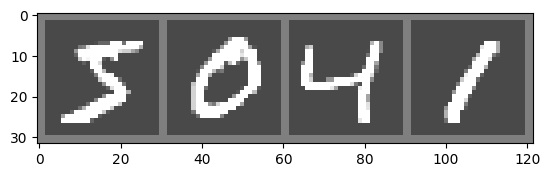

In [39]:
# show image of shape (1, 28, 28)

def imshow(img):
    # img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(torchvision.utils.make_grid(x_train[0:4]))

# LeNet-5
### for MNIST data set

In [79]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)

        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x, return_intermediate=False):
        outputs = {}

        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        outputs['conv1'] = x
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        outputs['conv2'] = x
        x = x.view(-1, self.num_flat_features(x))
        outputs['flatten'] = x
        x = F.relu(self.fc1(x))
        outputs['fc1'] = x
        x = F.relu(self.fc2(x))
        outputs['fc2'] = x
        x = self.fc3(x)
        outputs['fc3'] = x

        if return_intermediate:
            return outputs, x
        else:
            return  x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
    

In [80]:
# pass single image through the network
net = LeNet()

# pass single image through the network
outs, x_out = net(x_train[0].unsqueeze(1))

# Layer 1 - Conv2d 

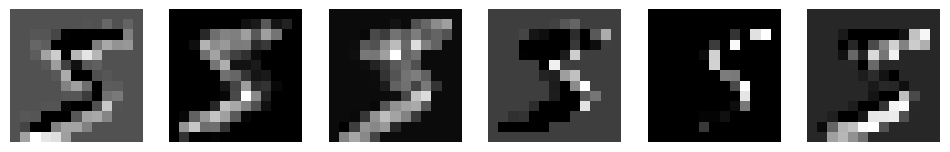

In [67]:
feature_maps = outs['conv1'].detach().cpu().numpy()


fig, axes = plt.subplots(1, len(feature_maps[0]), figsize=(12, 6))
for idx, feature_map in enumerate(feature_maps[0]):
    axes[idx].imshow(feature_map, cmap='gray')
    axes[idx].axis('off')
plt.show()

# Layer 2 - Conv2d

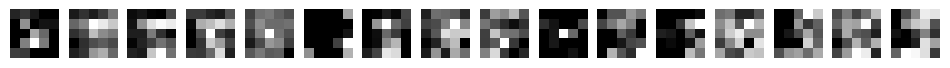

In [68]:
feature_maps = outs['conv2'].detach().cpu().numpy()

fig, axes = plt.subplots(1, len(feature_maps[0]), figsize=(12, 6))
for idx, feature_map in enumerate(feature_maps[0]):
    axes[idx].imshow(feature_map, cmap='gray')
    axes[idx].axis('off')
plt.show()

In [81]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

# CIFAR10